# __Name - Shradha Pujari__

# **__LGM-VIP Data Science Internship__**

# __Begineer Level Task 3: Music Recommendation__

__Importing the required python libraries and modules__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Recommenders as Recommenders

__Loading the dataset__

In [ ]:
song_df_1=pd.read_csv('triplets_file.csv')
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
len(song_df_1)

2000000

In [ ]:
song_df_2=pd.read_csv('song_data.csv')
song_df_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [ ]:
len(song_df_2)

1000000

__Merging two dataframes and dropping duplicates(if any)__

In [ ]:
song_df=pd.merge(song_df_1,song_df_2.drop_duplicates(['song_id']),on='song_id',how='left')
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
len(song_df)

2000000

# Data Preprocessing

In [ ]:
song_df['song']=song_df['title']+"-"+song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove-Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas-Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger-Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations-Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly-Foo Fighters


In [ ]:
song_df.tail()

,user_id,song_id,listen_count,title,release,artist_name,year,song
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0,Ignorance (Album Version)-Paramore
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009,Two Is Better Than One-Boys Like Girls featuri...
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007,What I've Done (Album Version)-Linkin Park
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010,Up-Justin Bieber
1999999,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJYOLS12A8C13C06F,1,Soil_ Soil (Album Version),The Con,Tegan And Sara,2007,Soil_ Soil (Album Version)-Tegan And Sara


# Data Visualisation

__Correlation between features__

In [ ]:
song_df.columns

Index(['user_id', 'song_id', 'listen_count', 'title', 'release', 'artist_name',
       'year', 'song'],
      dtype='object')

In [ ]:
song_corr=song_df.corr()
print(song_corr)

              listen_count      year
listen_count      1.000000 -0.021302
year             -0.021302  1.000000


__Most listened songs__

Text(0.5, 1.0, 'Most listened songs')

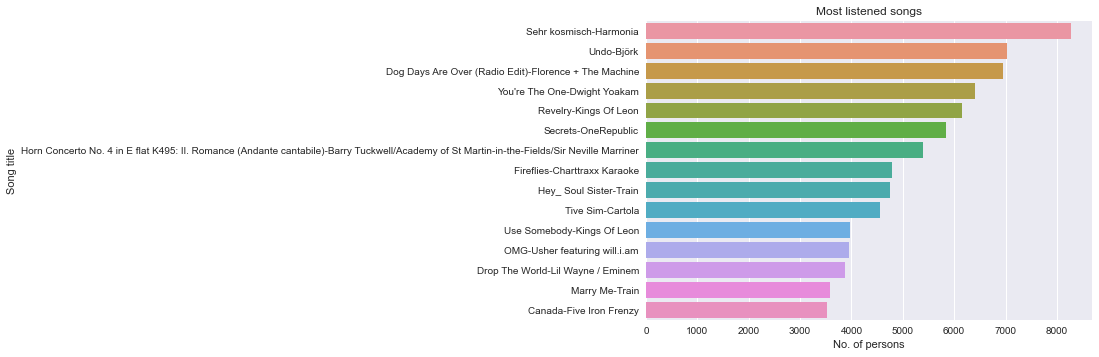

In [ ]:
#Top 15
plt.style.use('seaborn')
sns.barplot(x=song_df['song'].value_counts()[:15].values,y=song_df['song'].value_counts()[:15].index)
plt.xlabel('No. of persons')
plt.ylabel('Song title')
plt.title('Most listened songs')

__Reducing the size of dataset__

In [ ]:
song_df=song_df.head(100000)

__Sum of listen_count of different songs__

In [ ]:
song_grouped=song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,2
1,#40-DAVE MATTHEWS BAND,9
2,& Down-Boys Noize,25
3,' Cello Song-Nick Drake,3
4,'97 Bonnie & Clyde-Eminem,10


__Most listened songs and their corresponding percentage__

In [ ]:
grouped_sum=song_grouped['listen_count'].sum()
song_grouped['percentage']=(song_grouped['listen_count']/grouped_sum)*100
song_grouped.sort_values(['listen_count','song'],ascending=[0,1])

,song,listen_count,percentage
7079,Sehr kosmisch-Harmonia,427,0.427
9030,Undo-Björk,367,0.367
2052,Dog Days Are Over (Radio Edit)-Florence + The ...,363,0.363
9815,You're The One-Dwight Yoakam,317,0.317
7067,Secrets-OneRepublic,308,0.308
...,...,...,...
9743,You Dont Understand Me-The Raconteurs,1,0.001
9785,You Shouldn't Kiss Me Like This-Toby Keith,1,0.001
9808,You're In My Heart-Rhonda Vincent,1,0.001
9853,Your Time Has Come-Audioslave,1,0.001


__Recommendation Engine based on Popularity of Songs__

In [ ]:
pr=Recommenders.popularity_recommender_py()

In [ ]:
pr.create(song_df,'user_id','song')

In [ ]:
pr.recommend(song_df['user_id'][5])

,user_id,song,score,Rank
7079,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch-Harmonia,427,1.0
9030,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo-Björk,367,2.0
2052,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit)-Florence + The ...,363,3.0
9815,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One-Dwight Yoakam,317,4.0
7067,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets-OneRepublic,308,5.0
6727,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry-Kings Of Leon,306,6.0
3587,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,266,7.0
2695,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies-Charttraxx Karaoke,258,8.0
8793,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim-Cartola,246,9.0
3460,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister-Train,235,10.0


In [ ]:
pr.recommend(song_df['user_id'][10])

,user_id,song,score,Rank
7079,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch-Harmonia,427,1.0
9030,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo-Björk,367,2.0
2052,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit)-Florence + The ...,363,3.0
9815,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One-Dwight Yoakam,317,4.0
7067,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets-OneRepublic,308,5.0
6727,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry-Kings Of Leon,306,6.0
3587,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,266,7.0
2695,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies-Charttraxx Karaoke,258,8.0
8793,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim-Cartola,246,9.0
3460,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister-Train,235,10.0


# Item Similarity Recommendation

In [ ]:
ir=Recommenders.item_similarity_recommender_py()
ir.create(song_df,'user_id','song')

In [ ]:
#for user_id=100
user_items=ir.get_user_items(song_df['user_id'][100])

In [ ]:
for user_item in user_items:
    print(user_item)

Undo-Björk
Dog Days Are Over (Radio Edit)-Florence + The Machine
High Life-Daft Punk
You're The One-Dwight Yoakam
Where Did You Sleep Last Night-Nirvana
Come As You Are-Nirvana
Hey_ Soul Sister-Train
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)-Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Rhyme & Reason-DAVE MATTHEWS BAND
Sehr kosmisch-Harmonia
Someone Else's Arms-Mae
Cry For Help (Album Version)-Shinedown
Lady In Black-Ensiferum
For You (Amended/Radio Edit LP)-Staind
Fireflies-Charttraxx Karaoke
Secrets-OneRepublic
Esta Es Para Hacerte Féliz-Jorge Gonzalez
Revelry-Kings Of Leon
Marry Me-Train
OMG-Usher featuring will.i.am
Drop The World-Lil Wayne / Eminem
Ain't Misbehavin-Sam Cooke
Blow Me Away-Breaking Benjamin
Use Somebody-Kings Of Leon
Corn Bread-DAVE MATTHEWS BAND


In [ ]:
ir.recommend(song_df['user_id'][100])

No. of unique songs for the user: 25
no. of unique songs in the training set: 9891
Non zero values in cooccurence_matrix :71531


,user_id,song,score,rank
0,e006b1a48f466bf59feefed32bec6494495a4436,Pursuit Of Happiness (nightmare)-Kid Cudi / MG...,0.087215,1
1,e006b1a48f466bf59feefed32bec6494495a4436,Lucky (Album Version)-Jason Mraz & Colbie Caillat,0.084807,2
2,e006b1a48f466bf59feefed32bec6494495a4436,Somebody To Love-Justin Bieber,0.084336,3
3,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist-Coldplay,0.080528,4
4,e006b1a48f466bf59feefed32bec6494495a4436,Love Story-Taylor Swift,0.074978,5
5,e006b1a48f466bf59feefed32bec6494495a4436,The Only Exception (Album Version)-Paramore,0.074513,6
6,e006b1a48f466bf59feefed32bec6494495a4436,Alejandro-Lady GaGa,0.073897,7
7,e006b1a48f466bf59feefed32bec6494495a4436,Heartbreak Warfare-John Mayer,0.073183,8
8,e006b1a48f466bf59feefed32bec6494495a4436,Tive Sim-Cartola,0.070916,9
9,e006b1a48f466bf59feefed32bec6494495a4436,Bleed It Out [Live At Milton Keynes]-Linkin Park,0.069638,10


In [ ]:
ir.get_similar_items(['U Smile-Justin Bieber'])

no. of unique songs in the training set: 9891
Non zero values in cooccurence_matrix :2098


,user_id,song,score,rank
0,,Eenie Meenie-Sean Kingston and Justin Bieber,0.298387,1
1,,Somebody To Love-Justin Bieber,0.297619,2
2,,Love Me-Justin Bieber,0.289720,3
3,,One Less Lonely Girl-Justin Bieber,0.264151,4
4,,One Time-Justin Bieber,0.230769,5
5,,That Should Be Me-Justin Bieber,0.174312,6
6,,Down To Earth-Justin Bieber,0.168421,7
7,,Heartbreak Warfare-John Mayer,0.163636,8
8,,Marry Me-Train,0.154472,9
9,,Lucky (Album Version)-Jason Mraz & Colbie Caillat,0.151042,10


__Thank You!__